# The Sparks Foundation--- Data Science and Business Analytics Internship

## Author: Saransh Juneja


## Task 1: Prediction using Supervised Machine Learning

### Problem statement: What will be the predicted score if student studies for 9.25 hrs a day?

### Solution: Used Linear Regression  Supervised Machine Model


#### STEP 1: IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wg  # To ignore the warnings
wg.filterwarnings("ignore")

In [3]:
# Reading Dataset from given url
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [4]:
# observe dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Check for null values (if any)
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### STEP 2: VISUALIZING THE DATASET

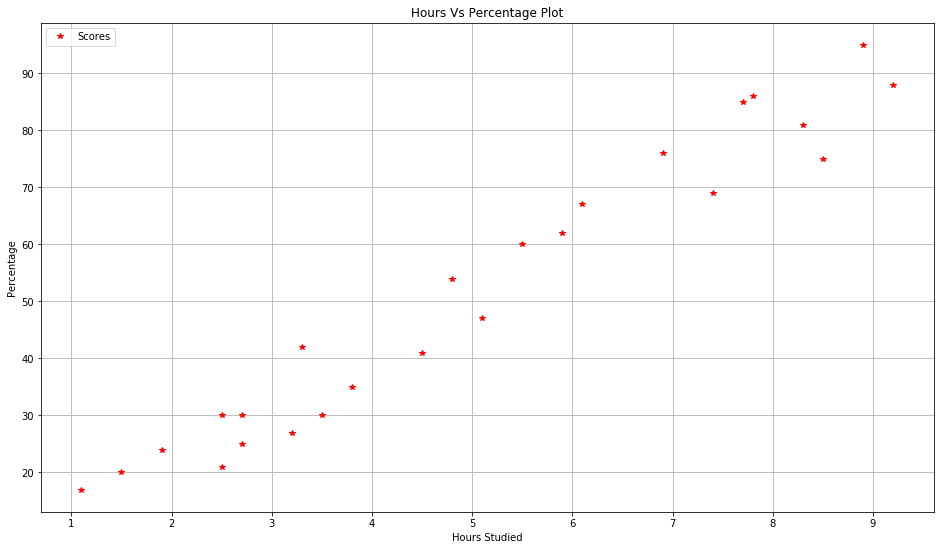

In [11]:
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours' , y='Scores' , style='*',color='Red')
plt.title("Hours Vs Percentage Plot")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.grid()
plt.show()

#### By the plot we can observe there is a linear relationship between the Percentage and Hours studied so we can use Linear Regression model to predict the further values.

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### STEP 3: Data Preparation
#### We split the whole dataset into 2 parts "Testing" and "Training" data

In [13]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
X=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

#### STEP 4: TRAINING MODEL

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### STEP 5: VISUALIZING THE MODEL

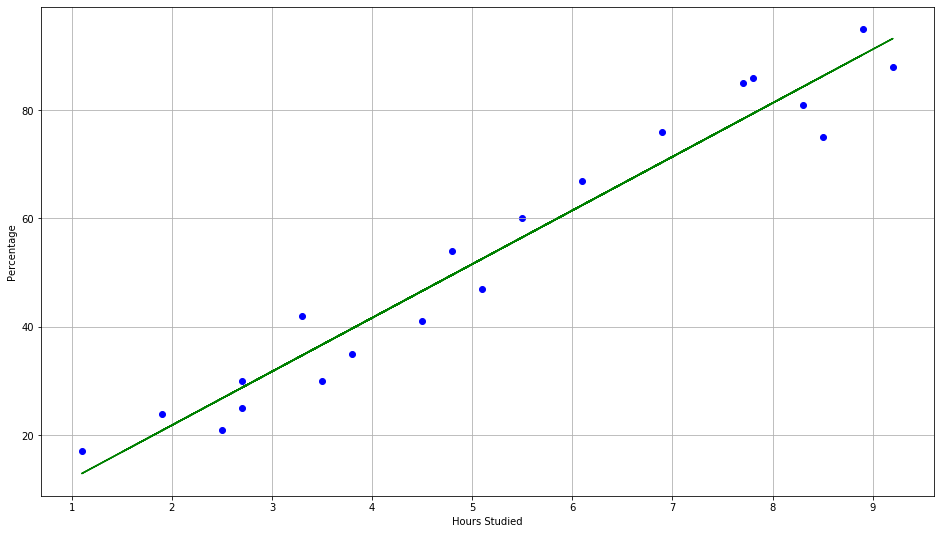

In [19]:
line= model.coef_*X + model.intercept_

#PLOTTING THE TRAINING DATA
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train,y_train,color='blue')
plt.plot(X , line , color='Green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.grid()
plt.show()

#### STEP 6: PREDICTING VALUES


In [20]:
print(X_test)
y_pred= model.predict(X_test) # Predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [22]:
# COMPARING ACTUAL VS PREDICTED 
comp=pd.DataFrame({'Actual':[y_test] , 'Predicted':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [29]:
# TESTING WITH THE DATA GIVEN IN THE PROBLEM
hours=9.25
test=np.array([hours]).reshape(-1,1)
predicted=model.predict(test)
print("The predicted score if the student studies for",format(hours),"hours is",format(predicted[0]))

The predicted score if the student studies for 9.25 hours is [93.69173249]


#### STEP 7: EVALUATING THE MODEL
##### In this last step we are going to evaluate our trained model by calculating mean absolute error and predict accuracy

In [32]:
from sklearn import metrics
print("Mean Absolute Error=", metrics.mean_absolute_error(y_test,y_pred))
print("R2 Score=",metrics.r2_score(y_test,y_pred))

Mean Absolute Error= 4.183859899002975
R2 Score= 0.9454906892105356
